In [4]:
%pip install --upgrade pip
%pip install matplotlib
%pip install osmnx
%pip install networkx
%pip install csv
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv


Note: you may need to restart the kernel to use updated packages.


In [5]:

import networkx as nx
import osmnx as ox
import matplotlib
import csv
import random
from dijkstra_algorithm import dijkstra_algorithm
from dijkstra_algorithm import make_route
from dijkstra_algorithm import dijkstra_algorithm_driver
from deliveries import delivery
from other_funcs import *
from minheap import MinHeap
from maxheap import MaxHeap
from driver import driver
import heapq

ox.__version__
random.seed(None)

In [13]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place("Chicago, Illinois, USA", network_type="drive")
Gc = ox.utils_graph.get_largest_component(G, strongly=True)

Need to make a list of all restaurants using what is below this markdown

In [7]:
file = open('Food_Inspections_20240223.csv')
type(file)

csvreader = csv.reader(file)
header = []
header = next(csvreader)
header

food_inspections = []
filled_locations = []

rows = []
for row in csvreader:
    rows.append(row)

I condensed all the sections into a single function that does the graphing.

In [10]:
def get_graph(num_of_drivers,num_of_deliveries,graph,restaurants):
    N_L = list(graph.nodes)[None:None:None]
    graph = ox.speed.add_edge_speeds(graph)
    graph = ox.speed.add_edge_travel_times(graph)
    items = random_restaurant_locations(restaurants,num_of_deliveries)
    list_nodes = find_node(items,graph)

    list_of_deliveries = []
    for i in list_nodes:
        d = delivery(i,N_L)
        list_of_deliveries.append(d)
    
    drivers = []
    for i in range(num_of_drivers):
        single = driver(N_L)
        drivers.append(single)
    find_routes_for_res_to_dropoff(graph,list_of_deliveries)
    restaurant_set = set()
    for i in list_of_deliveries:
        restaurant_set.add(i.restaurant_loc)
    
    find_shortest_driver_dikstra(graph,list_of_deliveries,drivers,restaurant_set)

    routes = []
    routes = graph_full_routes(list_of_deliveries)
    fig, ax = ox.plot_graph_routes(graph, routes, node_size=0)

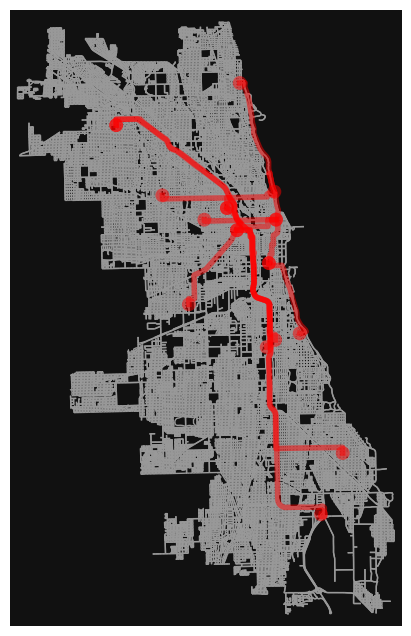

In [12]:
drivers = 8
orders = 5

get_graph(drivers,orders,Gc,rows)
